In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def parse_func_name(func_name_str):
    # Func:'load_index' => "load_index"
    str_l = func_name_str.split(":")
    if "completed" in func_name_str:
        return func_name_str
    return str_l[-1][1:-1]

def parse_latency(time_str):
    return float(time_str[:-1])

In [52]:
# read log file without header
df = pd.read_csv('../logs/st_index.log', header=None)

# change column name
df.columns = ["timesteps", "action", "latency", "file_path"]

df["action"] = df["action"].map(parse_func_name)
df["latency"] = df["latency"].map(parse_latency)

# make a new column for the cumulative sum of the latency
df["cumulative_latency"] = df["latency"].cumsum()

df.head()

,timesteps,action,latency,file_path,cumulative_latency
0,2024-04-10 13:52:37,load_index,0.000111,shards/idxs/embeds_centroids.index,0.000111
1,2024-04-10 13:52:37,query_index,0.003985,shards/idxs/embeds_centroids.index,0.004096
2,2024-04-10 13:52:37,load_index,0.046999,shards/idxs/embeds_80.index,0.051094
3,2024-04-10 13:52:37,query_index,0.007518,shards/idxs/embeds_80.index,0.058612
4,2024-04-10 13:52:37,load_index,0.053365,shards/idxs/embeds_52.index,0.111977


In [53]:
load_index_hbars = []
search_index_hbars = []
for idx, row in df.iterrows():
    start_time = row["cumulative_latency"] - row["latency"]
    if row["action"] == "load_index":
        load_index_hbars.append((start_time, row["latency"]))
    elif row["action"] == "query_index":
        search_index_hbars.append((start_time, row["latency"]))

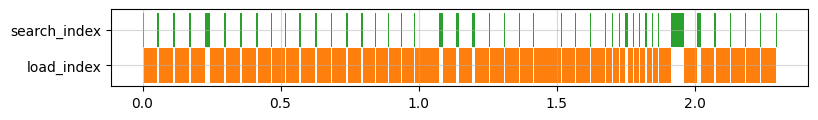

In [58]:
upto = 50

fig, ax = plt.subplots(figsize=(9, 1))
# ax.set_yticklabels(['load', 'search'])

bar_width = 0.5
bar_gap = 0.01
# [(x, length), ()], (y, bar_width)
ax.broken_barh(load_index_hbars[:upto], (1, bar_width), facecolors =('tab:orange'))
ax.broken_barh(search_index_hbars[:upto], (1+bar_width+bar_gap, bar_width), facecolors =('tab:green'))

ax.set_yticks([1+bar_width/2, 1+bar_width+bar_gap+bar_width/2], ['load_index', 'search_index'])

ax.grid(True, alpha=0.5)
fig.show()

In [59]:
# read log file without header
df = pd.read_csv('../logs/st_query.log', header=None)

# change column name
df.columns = ["timesteps", "action", "latency", "file_path"]

df["action"] = df["action"].map(parse_func_name)
df["latency"] = df["latency"].map(parse_latency)

# make a new column for the cumulative sum of the latency
df["cumulative_latency"] = df["latency"].cumsum()

load_index_hbars = []
search_index_hbars = []
for idx, row in df.iterrows():
    start_time = row["cumulative_latency"] - row["latency"]
    if row["action"] == "load_index":
        load_index_hbars.append((start_time, row["latency"]))
    elif row["action"] == "query_index":
        search_index_hbars.append((start_time, row["latency"]))

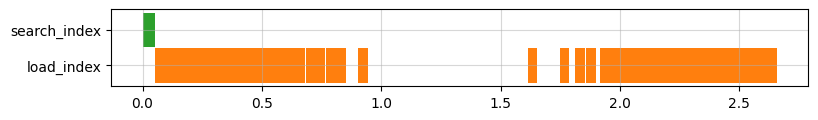

In [62]:
fig, ax = plt.subplots(figsize=(9, 1))
# ax.set_yticklabels(['load', 'search'])

bar_width = 0.5
bar_gap = 0.01
# [(x, length), ()], (y, bar_width)
ax.broken_barh(load_index_hbars[:upto], (1, bar_width), facecolors =('tab:orange'))
ax.broken_barh(search_index_hbars[:upto], (1+bar_width+bar_gap, bar_width), facecolors =('tab:green'))

ax.set_yticks([1+bar_width/2, 1+bar_width+bar_gap+bar_width/2], ['load_index', 'search_index'])

ax.grid(True, alpha=0.5)
fig.show()

In [64]:
search_index_hbars[:50]

[(9.906999999999971e-05, 0.05053916),
 (0.09634825999999999, 0.00014739),
 (0.13787381999999998, 0.00012624),
 (0.1793224, 0.00011903),
 (0.22017327999999997, 8.743e-05),
 (0.26140571999999995, 0.00011035),
 (0.3042510299999999, 9.821e-05),
 (0.3455911399999999, 9.257e-05),
 (0.3887548599999999, 0.00011479),
 (0.4297747899999999, 0.00011615),
 (0.4709781899999999, 9.39e-05),
 (0.4710720899999999, 9.513e-05),
 (0.4711672199999999, 7.733e-05),
 (0.4712445499999999, 7.068e-05),
 (0.47131522999999986, 6.825e-05),
 (0.47138347999999985, 6.821e-05),
 (0.47145168999999987, 6.212e-05),
 (0.47151380999999987, 6.758e-05),
 (0.4715813899999999, 6.559e-05),
 (0.5131548899999999, 9.543e-05),
 (0.5543134599999999, 0.00010156),
 (0.5544150199999999, 7.146e-05),
 (0.5544864799999999, 6.864e-05),
 (0.5545551199999998, 6.579e-05),
 (0.5546209099999998, 6.732e-05),
 (0.5546882299999998, 6.406e-05),
 (0.5547522899999998, 7.294e-05),
 (0.5548252299999998, 6.706e-05),
 (0.5977847399999998, 9.555e-05),
 (0.6